In [1]:
# Statistical analysis of the job data

from matplotlib.ticker import MultipleLocator, FixedLocator, LogLocator, NullFormatter, ScalarFormatter
from matplotlib.pyplot import MultipleLocator
from datetime import date, datetime, time, timedelta
import os
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import seaborn as sns
import time, datetime, pytz
import re

In [2]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'libertine'

In [17]:
data = pd.read_csv("slurm_data_2022_cleaned.csv")
data.head()

/Users/chuxiaoyu/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (17,18,19,20,21,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,JobID,GID,UID,Partition,Submit,Start,End,ElapsedRaw,CPUTimeRAW,...,ReqMem,is_gpu,ave_cpu_freq,req_mem,state,node_list,submit_hour_of_day,submit_day_of_week,submit_date,waiting_time
0,2,8619864,54655.0,55101.0,gpu_titan+,2022-01-01 01:55:55,2022-01-01 01:55:55,2022-01-01 02:02:51,416,9984,...,186G,True,NaN,190464.0,COMPLETED,{'r28n1'},1,5,2022-01-01,0.0
1,3,8619865,54655.0,55101.0,gpu_titan+,2022-01-01 03:49:53,2022-01-01 03:50:05,2022-01-01 03:56:51,406,9744,...,186G,True,NaN,190464.0,COMPLETED,{'r28n1'},3,5,2022-01-01,12.0
2,4,8619866,54655.0,55101.0,gpu_titan+,2022-01-01 04:19:20,2022-01-01 04:19:20,2022-01-01 04:29:50,630,15120,...,186G,True,NaN,190464.0,TIMEOUT,{'r28n1'},4,5,2022-01-01,0.0
3,5,8619867,54655.0,55101.0,gpu_titan+,2022-01-01 04:32:24,2022-01-01 04:32:24,2022-01-01 04:42:22,598,14352,...,186G,True,NaN,190464.0,CANCELLED,{'r28n1'},4,5,2022-01-01,0.0
4,6,8619868,54655.0,55101.0,gpu_titan+,2022-01-01 04:47:23,2022-01-01 04:47:23,2022-01-01 04:50:11,168,4032,...,186G,True,NaN,190464.0,COMPLETED,{'r28n1'},4,5,2022-01-01,0.0


In [4]:
data['node_list'].unique()

array(["{'r28n1'}", "{'r28n3'}", "{'r26n3'}", ...,
       "{'r10n13', 'r11n23', '+'}", "{'r12n27', 'r13n', 'r13n2'}",
       "{'r13n27', 'r14n25', '+'}"], dtype=object)

In [154]:
data['Partition'].unique()

array(['gpu_titan+', 'normal', 'shared', 'fat_soil_+', 'gpu_shared',
       'gpu_share+', 'gpu', 'hared_ju+', 'short', 'gpu_short', 'sw',
       'fat', 'hared_52+', nan], dtype=object)

In [149]:
data['Partition'].value_counts()

normal        1165321
shared         520491
gpu_titan+      94703
gpu_shared      93966
gpu_share+      51544
gpu             10605
fat_soil_+       6420
gpu_short        5568
hared_52+        4822
sw               3852
hared_ju+        3079
fat              2199
short            1447
Name: Partition, dtype: int64

In [4]:
# filtered_jobs = data[(~data["NodeList"].str.contains("None")) & (~data["NodeList"].str.contains("software")) & (~data["NodeList"].str.contains("login"))]
# print(len(filtered_jobs))

# [x]tab.datasets overview

ge = data.loc[data["is_gpu"] == False]
ml = data.loc[data["is_gpu"] == True]

print('Generic jobs:\n', ge['state'].value_counts(), '\n')
print('ML jobs:\n', ml['state'].value_counts(), '\n')

Generic jobs:
 COMPLETED     1538685
FAILED         293684
CANCELLED      109030
TIMEOUT         42246
OUT_OF_ME+      10824
NODE_FAIL          33
REQUEUED            3
Name: state, dtype: int64 

ML jobs:
 COMPLETED     190632
FAILED         70693
CANCELLED      31113
TIMEOUT        13438
OUT_OF_ME+       732
NODE_FAIL         13
REQUEUED           2
Name: state, dtype: int64 



['COMPLETED', 'FAILED', 'CANCELLED', 'TIMEOUT', 'OUT_OF_ME+', 'NODE_FAIL'] 
 [0.6217146137113002, 0.2305534809847924, 0.10146988321163122, 0.0438258056310192, 0.002387296451994795, 4.23973413605633e-05]
['COMPLETED', 'FAILED', 'CANCELLED', 'TIMEOUT', 'OUT_OF_ME+', 'NODE_FAIL'] 
 [0.7714620920980394, 0.1472465599233895, 0.054665192616714424, 0.021181195334180662, 0.005426910436424075, 1.6545458647634376e-05]


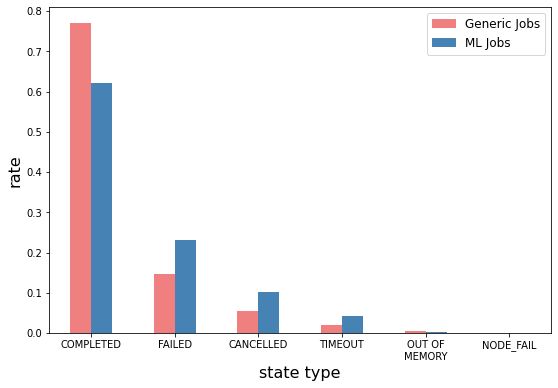

In [284]:
# fig.Generic and ML jobs distribution per execution state type

ge = data.loc[data["is_gpu"] == False]
ml = data.loc[data["is_gpu"] == True]

ml_state_l, ml_count_l = [], []
for idx, name in enumerate(ml['state'].value_counts().index.tolist()):
    ml_state_l.append(name)
    ml_count_l.append(ml['state'].value_counts(normalize=True)[idx])
print(ml_state_l[:6],'\n',ml_count_l[:6])
    
ge_state_l, ge_count_l = [], []
for idx, name in enumerate(ge['state'].value_counts().index.tolist()):
    ge_state_l.append(name)
    ge_count_l.append(ge['state'].value_counts(normalize=True)[idx])
print(ge_state_l[:6],'\n',ge_count_l[:6])

index = ['COMPLETED', 'FAILED', 'CANCELLED', 'TIMEOUT', 'OUT OF\nMEMORY', 'NODE_FAIL']

df = pd.DataFrame({'Generic Jobs': ge_count_l[:6], 'ML Jobs': ml_count_l[:6]}, index=index)
ax = df.plot.bar(figsize=(9,6), rot=0, ylabel='percent', xlabel='state type', color = ['lightcoral','steelblue'])

ax.set_ylabel('rate',fontdict={'fontsize':16})
ax.set_xlabel('state type',fontdict={'fontsize':16})
ax.legend(fontsize=12)

['COMPLETED', 'FAILED', 'CANCELLED', 'TIMEOUT', 'OUT_OF_ME+', 'NODE_FAIL'] 
 [0.6217146137113002, 0.2305534809847924, 0.10146988321163122, 0.0438258056310192, 0.002387296451994795, 4.23973413605633e-05]
['COMPLETED', 'FAILED', 'CANCELLED', 'TIMEOUT', 'OUT_OF_ME+', 'NODE_FAIL'] 
 [0.7714620920980394, 0.1472465599233895, 0.054665192616714424, 0.021181195334180662, 0.005426910436424075, 1.6545458647634376e-05]


findfont: Font family ['libertine'] not found. Falling back to DejaVu Sans.


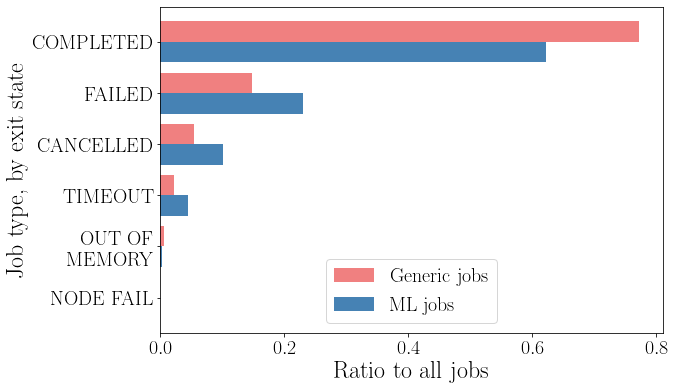

In [4]:
# [horizonal] fig.Generic and ML jobs distribution per execution state type
ge = data.loc[data["is_gpu"] == False]
ml = data.loc[data["is_gpu"] == True]

ml_state_l, ml_count_l = [], []
for idx, name in enumerate(ml['state'].value_counts().index.tolist()):
    ml_state_l.append(name)
    ml_count_l.append(ml['state'].value_counts(normalize=True)[idx])
print(ml_state_l[:6],'\n',ml_count_l[:6])
    
ge_state_l, ge_count_l = [], []
for idx, name in enumerate(ge['state'].value_counts().index.tolist()):
    ge_state_l.append(name)
    ge_count_l.append(ge['state'].value_counts(normalize=True)[idx])
print(ge_state_l[:6],'\n',ge_count_l[:6])

ge_count_l = ge_count_l[:6][::-1]
ml_count_l = ml_count_l[:6][::-1]
labels = ["COMPLETED", "FAILED", "CANCELLED", "TIMEOUT", "OUT OF\nMEMORY", "NODE FAIL"][::-1]

y_axis = np.arange(len(labels))

f = plt.figure()
f.set_figwidth(9)
f.set_figheight(6)

# plt.barh(y_axis + 0.2, ml_count_l, 0.4, label = 'ML jobs', color = 'steelblue')
# plt.barh(y_axis - 0.2, ge_count_l, 0.4, label = 'Generic jobs', color = 'lightcoral')
plt.barh(y_axis + 0.2, ge_count_l, 0.4, label = 'Generic jobs', color = 'lightcoral')
plt.barh(y_axis - 0.2, ml_count_l, 0.4, label = 'ML jobs', color = 'steelblue')

plt.tick_params(axis='both', which='major', labelsize=20)
plt.yticks(y_axis, labels)
plt.xlabel("Ratio to all jobs", fontsize = 24)
plt.ylabel("Job type, by exit state", fontsize = 24)
plt.legend(loc = "lower center", prop={'size': 20})
plt.show()
f.savefig('fig-state-type.pdf', bbox_inches = 'tight')

In [8]:
# tab.overview of our job traces dataset
# Data Source, Data Timespan, #Nodes, #Users, #Scheduled Jobs, 
# ML: %Completed Jobs, %Uncompleted Jobs, Generic: %Completed Jobs, %Uncompleted Jobs
def computeNumNodes(df):
    node_l = []
    for i in df["node_list"]:
        r = re.findall(r"r[0-9]+n[0-9]+",i)
        for j in r:
            node_l.append(j)
    node_l = set(node_l)
    return len(node_l)

DataSource = "SURFLisa"
DataTimespan = '12 months'
Year = 2022
numNodes = computeNumNodes(data)
numUsers = len(data['UID'].unique())
numJobs = len(data)

pctMLJobs = len(ml)*1.0/numJobs*1.0
pctGEJobs = len(ge)*1.0/numJobs*1.0

pctMLCompletedJobs = len(ml[ml["state"]=='COMPLETED'])*1.0/len(ml)
pctMLUncompletedJobs = len(ml[ml["state"]!='COMPLETED'])*1.0/len(ml)
pctGECompletedJobs = len(ge[ge["state"]=='COMPLETED'])*1.0/len(ge)
pctGEUncompletedJobs = len(ge[ge["state"]!='COMPLETED'])*1.0/len(ge)

print("DataSource:{}, DataTimespan:{}, Year:{}, numNodes:{}, numUsers:{}, numJobs:{}".format(DataSource, DataTimespan, Year, numNodes, numUsers, numJobs))
print("%ML Jobs:{:.2%}, %Generic Jobs:{:.2%}".format(pctMLJobs, pctGEJobs))
print("%ML Completed Jobs:{:.2%}, %ML Uncompleted Jobs:{:.2%}".format(pctMLCompletedJobs, pctMLUncompletedJobs))
print("%Generic Completed Jobs:{:.2%}, %Generic Uncompleted Jobs:{:.2%}".format(pctGECompletedJobs, pctGEUncompletedJobs))

DataSource:SURFLisa, DataTimespan:12 months, Year:2022, numNodes:348, numUsers:2662, numJobs:2301128
%ML Jobs:13.32%, %Generic Jobs:86.68%
%ML Completed Jobs:62.17%, %ML Uncompleted Jobs:37.83%
%Generic Completed Jobs:77.15%, %Generic Uncompleted Jobs:22.85%


In [6]:
# fig.Failed jobs in the period of one year
group_date = data.copy()
group_date["Submit"] = pd.to_datetime(group_date["Submit"], utc=True)
group_date = group_date.set_index("Submit")
group_date = group_date.groupby([group_date.index.date, "is_gpu"]).count().unstack(1)
datelist = list(group_date.index.values) 
submissionlist = group_date["JobID"].fillna(0)  # just grab one column as all columns have the same counts
submissionlist.columns = ['generic', 'ml']

date_max_value = submissionlist.sum(axis=1).idxmax()
max_val = submissionlist.loc[date_max_value].sum()
print(date_max_value, max_val)
print("{:,}".format(max_val))

2022-06-14 163786
163,786


<ipython-input-7-443f928e3f59>:2: MatplotlibDeprecationWarning: The 'subsy' parameter of __init__() has been renamed 'subs' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale("symlog", subsy = [1,2,3,4,5,6,7,8,9])
<ipython-input-7-443f928e3f59>:3: UserWarning: Attempting to set identical bottom == top == 1 results in singular transformations; automatically expanding.
  plt.ylim(bottom=1)


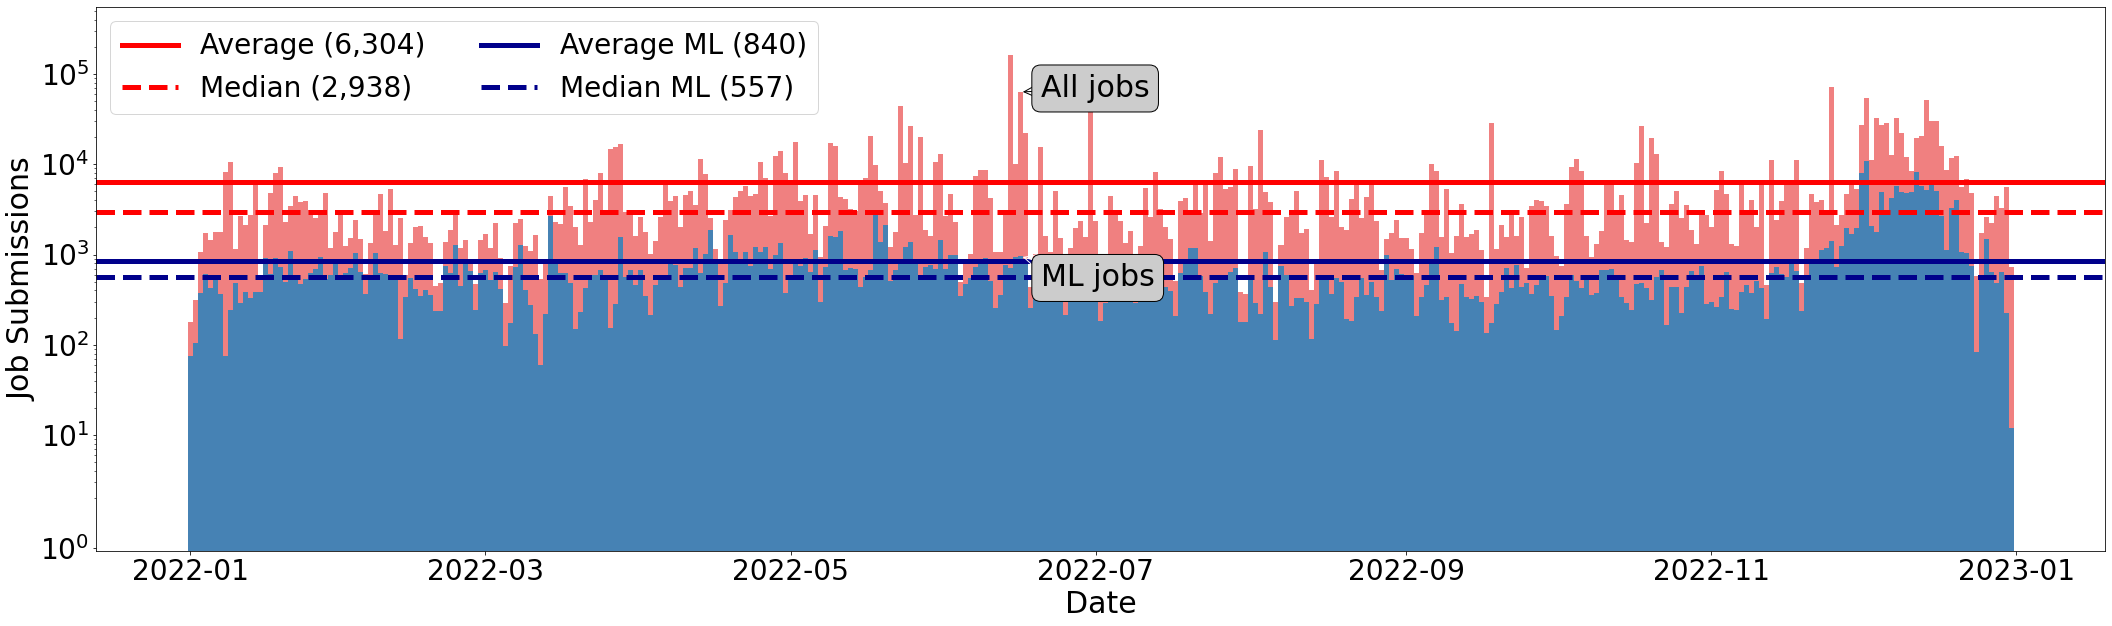

In [7]:
fig, ax = plt.subplots(figsize=(36, 10))
plt.yscale("symlog", subsy = [1,2,3,4,5,6,7,8,9])
plt.ylim(bottom=1)
plt.ylim(top=5.5 * 10**5)
plt.locator_params(axis='y', numticks=12)
ax.bar(datelist, submissionlist.sum(axis=1), width=1, color="lightcoral")
ax.bar(datelist, submissionlist['ml'], width=1, color="steelblue")  # Plot ML jobs overlapping
plt.xlabel("Date", fontsize=30)
plt.ylabel("Job Submissions", fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=28)
ax.tick_params(axis='both', which='minor', labelsize=28)

# date_max_value = submissionlist.sum(axis=1).idxmax()
# max_value = submissionlist.loc[date_max_value].sum()
# ax.annotate("{:,}".format(int(max_value)),
#             xy=(date_max_value, max_value), xycoords='data',
#             xytext=(20, 0), textcoords='offset points',
#             fontsize=10,
#             arrowprops=dict(arrowstyle="->",
#                             connectionstyle="arc"
#                            )
#             )

annotate_date = submissionlist.sum(axis=1).sort_values().index[-3]
annotate_value_all_jobs = submissionlist.sum(axis=1).loc[annotate_date]
annotate_value_ml_jobs = submissionlist['ml'].loc[annotate_date]
bbox = dict(boxstyle ="round", fc ="0.8")
ax.annotate("All jobs",
            xy=(annotate_date, annotate_value_all_jobs), xycoords='data',
            xytext=(20, -5), textcoords='offset points',
            fontsize=30,bbox=bbox,
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc"
                           )
            )

ax.annotate("ML jobs",
            xy=(annotate_date, annotate_value_ml_jobs), xycoords='data',
            xytext=(20, -30), textcoords='offset points',
            fontsize=30, color="black",bbox=bbox,
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc",
                            color="white"
                           )
            )

combined = submissionlist.sum(axis=1)
median = combined.median()
median_zeroes_filtered = combined[combined > 0].median()
median_ml_jobs = submissionlist['ml'].median()
avg_ml_jobs = submissionlist['ml'].mean()
avg = combined.mean()
ax.axhline(avg, label="Average ({:,.0f})".format(avg), color="red", linestyle="solid", linewidth = 5)
ax.axhline(median, label="Median ({:,})".format(int(median)), color="red", linestyle="dashed", linewidth = 5)
# ax.axhline(median_zeroes_filtered, label="Median zeros filtered ({:,})".format(int(median_zeroes_filtered)), color="gold", linestyle="dotted")
ax.axhline(avg_ml_jobs, label="Average ML ({:,.0f})".format(avg_ml_jobs), color="darkblue", linestyle="solid", linewidth = 5)
ax.axhline(median_ml_jobs, label="Median ML ({:,})".format(int(median_ml_jobs)), color="darkblue", linestyle="dashed", linewidth = 5)
ax.legend(ncol=2, prop={"size": 28}, loc="upper left")
plt.savefig('fig-job-by-date.pdf', bbox_inches = 'tight')

findfont: Font family ['libertine'] not found. Falling back to DejaVu Sans.


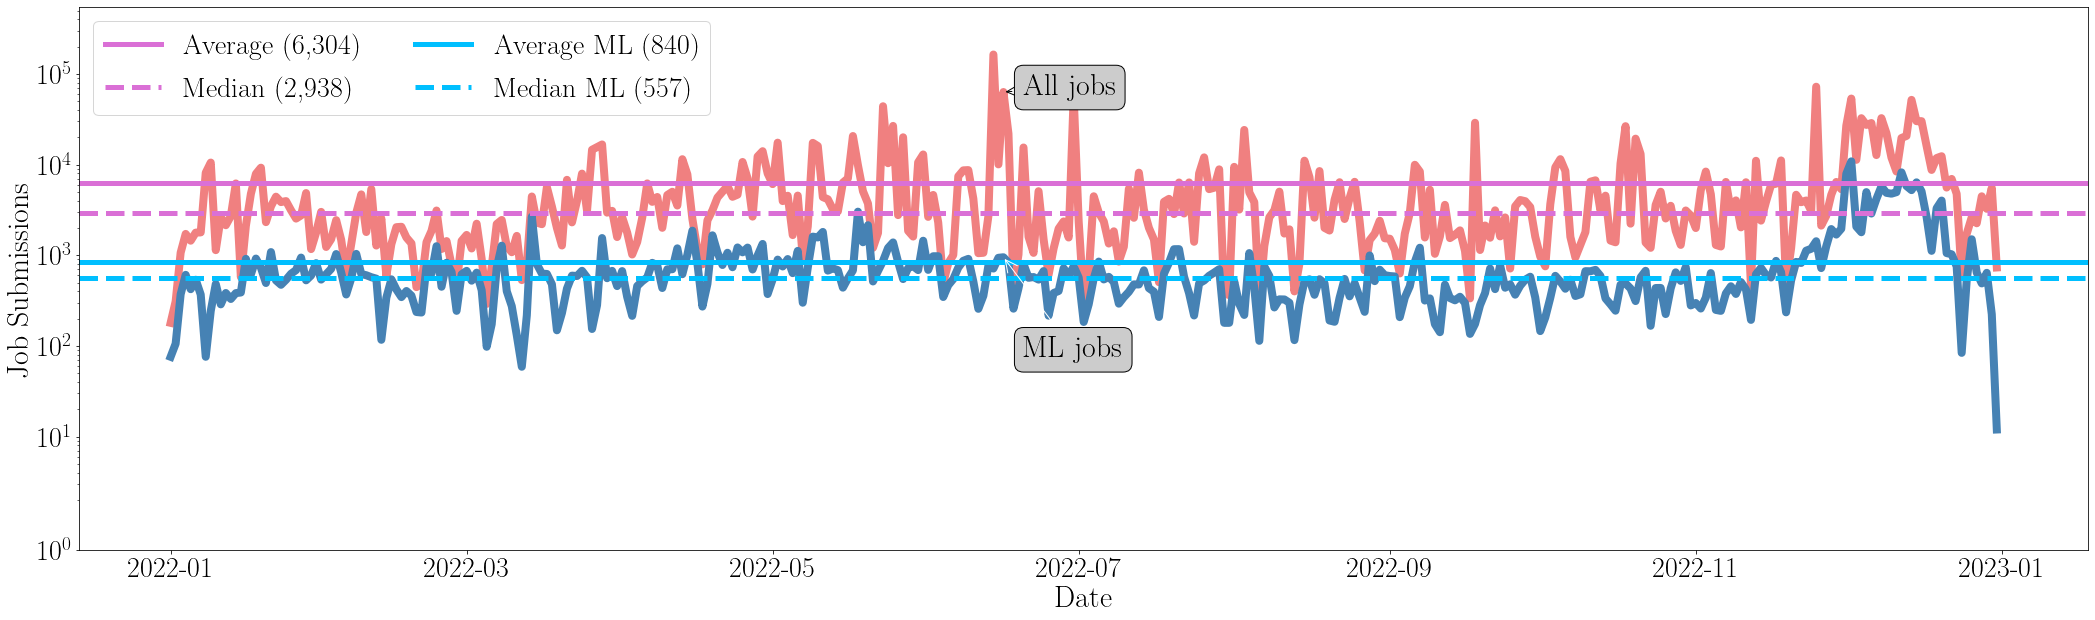

In [7]:
fig, ax = plt.subplots(figsize=(36, 10))
plt.yscale("symlog", subsy = [1,2,3,4,5,6,7,8,9])
plt.ylim(bottom=1)
plt.ylim(top=5.5 * 10**5)
plt.locator_params(axis='y', numticks=12)
ax.plot(datelist, submissionlist.sum(axis=1), color="lightcoral", linewidth='8')
ax.plot(datelist, submissionlist['ml'], color="steelblue",linewidth='8')  # Plot ML jobs overlapping
plt.xlabel("Date", fontsize=30)
plt.ylabel("Job Submissions", fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=28)
ax.tick_params(axis='both', which='minor', labelsize=28)

# date_max_value = submissionlist.sum(axis=1).idxmax()
# max_value = submissionlist.loc[date_max_value].sum()
# ax.annotate("{:,}".format(int(max_value)),
#             xy=(date_max_value, max_value), xycoords='data',
#             xytext=(20, 0), textcoords='offset points',
#             fontsize=10,
#             arrowprops=dict(arrowstyle="->",
#                             connectionstyle="arc"
#                            )
#             )

annotate_date = submissionlist.sum(axis=1).sort_values().index[-3]
annotate_value_all_jobs = submissionlist.sum(axis=1).loc[annotate_date]
annotate_value_ml_jobs = submissionlist['ml'].loc[annotate_date]
bbox = dict(boxstyle ="round", fc ="0.8")
ax.annotate("All jobs",
            xy=(annotate_date, annotate_value_all_jobs), xycoords='data',
            xytext=(20, -3), textcoords='offset points',
            fontsize=30,bbox=bbox,
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc"
                           )
            )

ax.annotate("ML jobs",
            xy=(annotate_date, annotate_value_ml_jobs), xycoords='data',
            xytext=(20, -100), textcoords='offset points',
            fontsize=30, color="black",bbox=bbox,
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc",
                            color="white"
                           )
            )

combined = submissionlist.sum(axis=1)
median = combined.median()
median_zeroes_filtered = combined[combined > 0].median()
median_ml_jobs = submissionlist['ml'].median()
avg_ml_jobs = submissionlist['ml'].mean()
avg = combined.mean()
ax.axhline(avg, label="Average ({:,.0f})".format(avg), color="orchid", linestyle="solid", linewidth = 5)
ax.axhline(median, label="Median ({:,})".format(int(median)), color="orchid", linestyle="dashed", linewidth = 5)
# ax.axhline(median_zeroes_filtered, label="Median zeros filtered ({:,})".format(int(median_zeroes_filtered)), color="gold", linestyle="dotted")
ax.axhline(avg_ml_jobs, label="Average ML ({:,.0f})".format(avg_ml_jobs), color="deepskyblue", linestyle="solid", linewidth = 5)
ax.axhline(median_ml_jobs, label="Median ML ({:,})".format(int(median_ml_jobs)), color="deepskyblue", linestyle="dashed", linewidth = 5)
ax.legend(ncol=2, prop={"size": 28}, loc="upper left")
plt.savefig('fig-job-by-date.pdf', bbox_inches = 'tight')

In [285]:
combined = submissionlist.sum(axis=1)
combined.min(), combined.max(), combined.mean()

(180, 163786, 6304.460273972602)

In [18]:
# divide jobs into: generic completed, generic failed, ml completed, ml failed

data['elapsedraw'] = data['ElapsedRaw']/3600.0
ge = data.loc[data["is_gpu"] == False]
ml = data.loc[data["is_gpu"] == True]

ge_completed = ge[ge['state'] == 'COMPLETED']
ge_failed = ge[ge['state'] == 'FAILED']
ml_completed = ml[ml['state'] == 'COMPLETED']
ml_failed = ml[ml['state'] == 'FAILED']

findfont: Font family ['libertine'] not found. Falling back to DejaVu Sans.


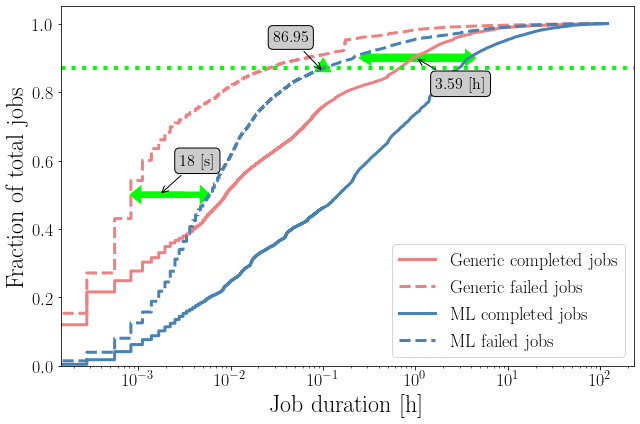

In [27]:
# Job duration CDF

def normalize(df):
    df = df['target'].value_counts(sort=False, normalize=True).rename_axis('target').reset_index(name='pdf')
    df["cdf"] = df["pdf"].cumsum()
    return df


def cdf(df_elapsed_values):
    all_values_df = pd.DataFrame({"target": df_elapsed_values["elapsedraw"].values})
    count_df = normalize(all_values_df)
    counts = np.unique(df_elapsed_values["elapsedraw"].values, return_counts=True)
    pdf = counts[1] / np.sum(counts[1])
    cdf = np.cumsum(pdf)
    return counts, cdf

ge_completed_counts, ge_completed_cdf = cdf(ge_completed)
ge_failed_counts, ge_failed_cdf = cdf(ge_failed)
ml_completed_counts, ml_completed_cdf = cdf(ml_completed)
ml_failed_counts, ml_failed_cdf = cdf(ml_failed)

fig = plt.figure(figsize=(9, 6))
plt.tick_params(axis='both', which='major', labelsize=18)
plt.ylim(0,1.05)
plt.plot(ge_completed_counts[0], ge_completed_cdf, drawstyle='steps', color = 'lightcoral', linestyle = 'solid', label = 'Generic completed jobs', linewidth=3)
plt.plot(ge_failed_counts[0], ge_failed_cdf, drawstyle='steps', color = 'lightcoral', linestyle = 'dashed', label = 'Generic failed jobs', linewidth=3)
plt.plot(ml_completed_counts[0], ml_completed_cdf, drawstyle='steps', color = 'steelblue', linestyle = 'solid', label = 'ML completed jobs', linewidth=3)
plt.plot(ml_failed_counts[0], ml_failed_cdf, drawstyle='steps', color = 'steelblue', linestyle = 'dashed', label = 'ML failed jobs', linewidth=3)
plt.xscale("log")
plt.xlabel("Job duration [h]", fontsize=24)
plt.ylabel("Fraction of total jobs", fontsize=24)
plt.legend(loc = "lower right", prop={'size': 18})

# plt.arrow(0.1, 0.5, 0, 0.35, head_width=0.05, head_length=0.03, linewidth=8, color='lime', length_includes_head=True)
# plt.arrow(0.1, 0.57, 0, -0.09, head_width=0.05, head_length=0.03, linewidth=8, color='lime', length_includes_head=True)
# bbox = dict(boxstyle ="round", fc ="0.8")
# plt.annotate("difference:\n0.42",
#             xy=(0.1, 0.7), xycoords='data',
#             xytext=(20, -30), textcoords='offset points',
#             fontsize=16, color="black",bbox=bbox,
#             arrowprops=dict(arrowstyle="->",
#                             connectionstyle="arc",
#                             color="black"
#                            )
#             )

plt.arrow(0.003, 0.5, -0.002, 0, head_width=0.02, head_length=0.0001, linewidth=6, color='lime')
plt.arrow(0.001, 0.5, 0.0045, 0, head_width=0.02, head_length=0.0005, linewidth=6, color='lime', length_includes_head=True)
bbox = dict(boxstyle ="round", fc ="0.8")
plt.annotate("18 [s]",
            xy=(0.0017, 0.5), xycoords='data',
            xytext=(20, 30), textcoords='offset points',
            fontsize=16, color="black",bbox=bbox,
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc",
                            color="black"
                           )
            )

plt.arrow(0.3, 0.9, -0.001, 0, head_width=0.005, head_length=0.01, linewidth=8, color='lime')
plt.arrow(0.3, 0.9, 3.591639, 0, head_width=0.005, head_length=0.1, linewidth=8, color='lime', length_includes_head=True)
bbox = dict(boxstyle ="round", fc ="0.8")
plt.annotate("3.59 [h]",
            xy=(1, 0.9), xycoords='data',
            xytext=(20, -30), textcoords='offset points',
            fontsize=16, color="black",bbox=bbox,
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc",
                            color="black"
                           )
            )

plt.arrow(0.1, 0.8695, 0, 0, head_width=0.01, head_length=0.01, linewidth=8, color='lime')

plt.annotate("86.95%",
            xy=(0.1, 0.86), xycoords='data',
            xytext=(-50, 30), textcoords='offset points',
            fontsize=16, color="black",bbox=bbox,
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc",
                            color="black"
                           )
            )

plt.axhline(0.8695, color="lime", linestyle="dotted", linewidth = 4)
# plt.axvline(0.1, color="lime", linestyle="dashed", linewidth = 2)

plt.tight_layout()
plt.savefig('fig-job-cdf.pdf', bbox_inches = 'tight')

In [ ]:
CPUTimeRAW

In [97]:
(3.805250-0.213611)*60

3.591639

In [140]:
ml_completed['NCPUS'].quantile([0, 0.1, 0.25, 0.5, 0.75, 0.9, 1])

0.00      1.0
0.10      3.0
0.25      3.0
0.50      3.0
0.75      6.0
0.90     20.0
1.00    192.0
Name: NCPUS, dtype: float64

In [37]:
ml_failed['elapsedraw'].quantile([0, 0.1, 0.25, 0.5, 0.75, 0.9, 1])

0.00      0.000000
0.10      0.001111
0.25      0.002500
0.50      0.006111
0.75      0.021389
0.90      0.213611
1.00    120.007500
Name: elapsedraw, dtype: float64

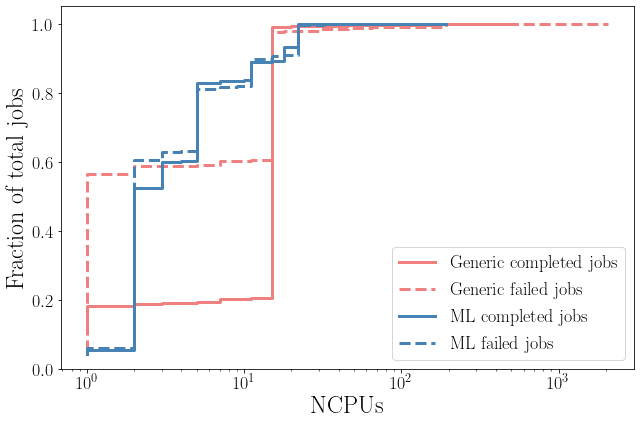

In [29]:
def normalize(df):
    df = df['target'].value_counts(sort=False, normalize=True).rename_axis('target').reset_index(name='pdf')
    df["cdf"] = df["pdf"].cumsum()
    return df


def cdf(df_elapsed_values):
    all_values_df = pd.DataFrame({"target": df_elapsed_values["NCPUS"].values})
    count_df = normalize(all_values_df)
    counts = np.unique(df_elapsed_values["NCPUS"].values, return_counts=True)
    pdf = counts[1] / np.sum(counts[1])
    cdf = np.cumsum(pdf)
    return counts, cdf

ge_completed_counts, ge_completed_cdf = cdf(ge_completed)
ge_failed_counts, ge_failed_cdf = cdf(ge_failed)
ml_completed_counts, ml_completed_cdf = cdf(ml_completed)
ml_failed_counts, ml_failed_cdf = cdf(ml_failed)

fig = plt.figure(figsize=(9, 6))
plt.tick_params(axis='both', which='major', labelsize=18)
plt.ylim(0,1.05)
plt.plot(ge_completed_counts[0], ge_completed_cdf, drawstyle='steps', color = 'lightcoral', linestyle = 'solid', label = 'Generic completed jobs', linewidth=3)
plt.plot(ge_failed_counts[0], ge_failed_cdf, drawstyle='steps', color = 'lightcoral', linestyle = 'dashed', label = 'Generic failed jobs', linewidth=3)
plt.plot(ml_completed_counts[0], ml_completed_cdf, drawstyle='steps', color = 'steelblue', linestyle = 'solid', label = 'ML completed jobs', linewidth=3)
plt.plot(ml_failed_counts[0], ml_failed_cdf, drawstyle='steps', color = 'steelblue', linestyle = 'dashed', label = 'ML failed jobs', linewidth=3)
plt.xscale("log")
plt.xlabel("NCPUs", fontsize=24)
plt.ylabel("Fraction of total jobs", fontsize=24)
plt.legend(loc = "lower right", prop={'size': 18})


plt.tight_layout()
plt.savefig('fig-cpu-cdf.pdf', bbox_inches = 'tight')

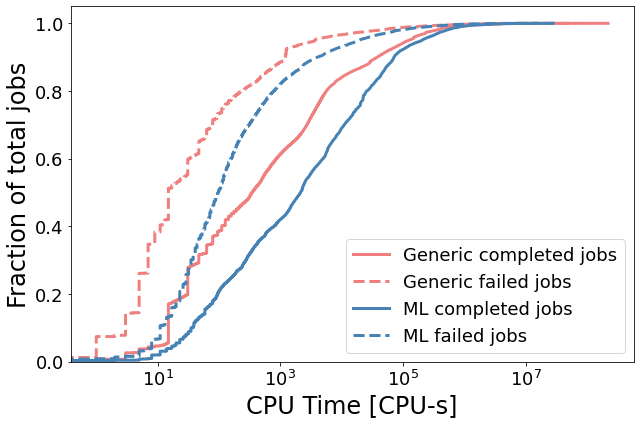

In [158]:
def normalize(df):
    df = df.value_counts(sort=False, normalize=True).rename_axis('target').reset_index(name='pdf')
    df["cdf"] = df["pdf"].cumsum()
    return df


def cdf(df_elapsed_values):
    all_values_df = pd.DataFrame({"target": df_elapsed_values["CPUTimeRAW"].values})
    count_df = normalize(all_values_df)
    counts = np.unique(df_elapsed_values["CPUTimeRAW"].values, return_counts=True)
    pdf = counts[1] / np.sum(counts[1])
    cdf = np.cumsum(pdf)
    return counts, cdf

ge_completed_counts, ge_completed_cdf = cdf(ge_completed)
ge_failed_counts, ge_failed_cdf = cdf(ge_failed)
ml_completed_counts, ml_completed_cdf = cdf(ml_completed)
ml_failed_counts, ml_failed_cdf = cdf(ml_failed)

fig = plt.figure(figsize=(9, 6))
plt.tick_params(axis='both', which='major', labelsize=18)
plt.ylim(0,1.05)
plt.plot(ge_completed_counts[0], ge_completed_cdf, drawstyle='steps', color = 'lightcoral', linestyle = 'solid', label = 'Generic completed jobs', linewidth=3)
plt.plot(ge_failed_counts[0], ge_failed_cdf, drawstyle='steps', color = 'lightcoral', linestyle = 'dashed', label = 'Generic failed jobs', linewidth=3)
plt.plot(ml_completed_counts[0], ml_completed_cdf, drawstyle='steps', color = 'steelblue', linestyle = 'solid', label = 'ML completed jobs', linewidth=3)
plt.plot(ml_failed_counts[0], ml_failed_cdf, drawstyle='steps', color = 'steelblue', linestyle = 'dashed', label = 'ML failed jobs', linewidth=3)
plt.xscale("log")
plt.xlabel("CPU Time [CPU-s]", fontsize=24)
plt.ylabel("Fraction of total jobs", fontsize=24)
plt.legend(loc = "lower right", prop={'size': 18})


plt.tight_layout()
# plt.savefig('fig-cpu-cdf.pdf', bbox_inches = 'tight')

In [145]:
# compute cpus
count = 0
for i in ge_completed['NCPUS']:
    if i == 16:
        count +=1
ratio_failed = count/len(ge_completed)

print('GE completed CPU=16', ratio_failed)


GE completed CPU=16 0.786468315477177


In [133]:
ge_failed['elapsedraw'].mean()*60, ml_failed['elapsedraw'].mean()*60

(13.927316038099903, 27.40325161850065)

In [138]:
# compute jobs <= 300 seconds
count = 0
for i in ml_completed['ElapsedRaw']:
    if i <= 360:
        count +=1
ratio_completed = count/len(ml_completed)
print('ML completed Jobs <= 360 seconds', ratio_completed)

count = 0
for i in ml_failed['ElapsedRaw']:
    if i <= 360:
        count +=1
ratio_failed = count/len(ml_failed)
print('ML failed Jobs <= 360 seconds', ratio_failed)
print('difference:', ratio_failed - ratio_completed)

ML completed Jobs <= 360 seconds 0.46208401527550463
ML failed Jobs <= 360 seconds 0.8695061745858854
difference: 0.4074221593103808


In [498]:
# Remove Outlier in Resource data
data2 = data.copy()
def three_sigma(ser1): 
    # 求平均值
    mean_value = ser1.mean()
    # 求标准差
    std_value = ser1.std()
    # 位于(μ-3σ,μ+3σ)区间的数据是正常的，不在这个区间的数据为异常的
    # ser1中的数值小于μ-3σ或大于μ+3σ均为异常值
    # 一旦发现有异常值，就标注为True，否则标注为False
    rule = (mean_value - 3 * std_value > ser1) | \
                                                   (ser1.mean() + 3 * ser1.std() < ser1)
    # 返回异常值的位置索引
    index = np.arange(ser1.shape[0])[rule]
    # 获取异常数据
    outrange = ser1.iloc[index]
    return outrange

df1 = three_sigma(data2['CPUTimeRAW'])
data2.replace(to_replace=df1, value=np.nan)
df2 = three_sigma(data2['NCPUS'])
data2.replace(to_replace=df2, value=np.nan)
df3 = three_sigma(data2['ReqCPUS'])
data2.replace(to_replace=df3, value=np.nan)
# print(df1, df2, df3)

,Unnamed: 0,JobID,GID,UID,Partition,Submit,Start,End,ElapsedRaw,CPUTimeRAW,...,ReqMem,is_gpu,ave_cpu_freq,req_mem,state,node_list,submit_hour_of_day,submit_day_of_week,submit_date,waiting_time
0,2,8619864,54655.0,55101.0,gpu_titan+,2022-01-01 01:55:55,2022-01-01 01:55:55,2022-01-01 02:02:51,416,9984,...,186G,True,NaN,190464.0,COMPLETED,{'r28n1'},1,5,2022-01-01,0.0
1,3,8619865,54655.0,55101.0,gpu_titan+,2022-01-01 03:49:53,2022-01-01 03:50:05,2022-01-01 03:56:51,406,9744,...,186G,True,NaN,190464.0,COMPLETED,{'r28n1'},3,5,2022-01-01,12.0
2,4,8619866,54655.0,55101.0,gpu_titan+,2022-01-01 04:19:20,2022-01-01 04:19:20,2022-01-01 04:29:50,630,15120,...,186G,True,NaN,190464.0,TIMEOUT,{'r28n1'},4,5,2022-01-01,0.0
3,5,8619867,54655.0,55101.0,gpu_titan+,2022-01-01 04:32:24,2022-01-01 04:32:24,2022-01-01 04:42:22,598,14352,...,186G,True,NaN,190464.0,CANCELLED,{'r28n1'},4,5,2022-01-01,0.0
4,6,8619868,54655.0,55101.0,gpu_titan+,2022-01-01 04:47:23,2022-01-01 04:47:23,2022-01-01 04:50:11,168,4032,...,186G,True,NaN,190464.0,COMPLETED,{'r28n1'},4,5,2022-01-01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2301123,2301705,10587253,47200.0,47539.0,normal,2022-12-31 22:44:37,2023-01-01 04:16:28,2023-01-01 04:19:54,206,3296,...,5760M,False,NaN,5760.0,COMPLETED,{'r10n16'},22,5,2022-12-31,19911.0
2301124,2301706,10587254,47200.0,47539.0,normal,2022-12-31 22:44:37,2023-01-01 04:17:59,2023-01-01 04:22:00,241,3856,...,5760M,False,NaN,5760.0,COMPLETED,{'r25n7'},22,5,2022-12-31,20002.0
2301125,2301707,10587255,59552.0,60028.0,shared,2022-12-31 23:05:42,2022-12-31 23:05:42,2022-12-31 23:12:55,433,866,...,8610M,False,NaN,8610.0,COMPLETED,{'r10n21'},23,5,2022-12-31,0.0
2301126,2301708,10587255.ba+,NaN,NaN,NaN,2022-12-31 23:05:42,2022-12-31 23:05:42,2022-12-31 23:12:55,433,866,...,NaN,False,1.0,NaN,COMPLETED,{'r10n21'},23,5,2022-12-31,0.0


In [398]:
# fill NaN values use mean()
data2['CPUTimeRAW'].fillna(data2['CPUTimeRAW'].mean(), inplace=True)
data2['NCPUS'].fillna(data2['NCPUS'].mean(), inplace=True)
data2['ReqCPUS'].fillna(data2['ReqCPUS'].mean(), inplace=True)

In [421]:
# divide jobs into: generic completed, generic failed, ml completed, ml failed

data2['elapsedraw'] = data2['ElapsedRaw']/3600.0
ge = data2.loc[data2["is_gpu"] == False]
ml = data2.loc[data2["is_gpu"] == True]

ge_completed = ge[ge['state'] == 'COMPLETED']
ge_failed = ge[ge['state'] == 'FAILED']
ml_completed = ml[ml['state'] == 'COMPLETED']
ml_failed = ml[ml['state'] == 'FAILED']

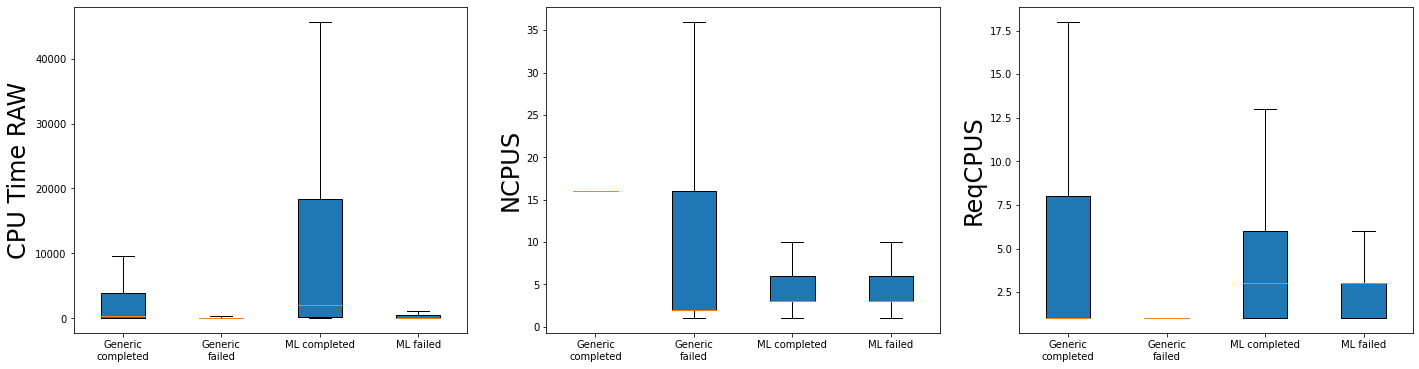

In [450]:
# CPUTimeRAW, NCPUS, ReqCPUS

fig, axes = plt.subplots(figsize = (24, 6), nrows = 1, ncols = 3)
box_1, box_2, box_3, box_4 = ge_completed['CPUTimeRAW'], ge_failed['CPUTimeRAW'], ml_completed['CPUTimeRAW'], ml_failed['CPUTimeRAW']
axes[0].boxplot([box_1, box_2, box_3, box_4], patch_artist = True, showfliers = False, labels = ['Generic\ncompleted', 'Generic\nfailed', 'ML completed', 'ML failed'])
axes[0].set_ylabel("CPU Time RAW", fontsize = 24)

box_1, box_2, box_3, box_4 = ge_completed['NCPUS'], ge_failed['NCPUS'], ml_completed['NCPUS'], ml_failed['NCPUS']
axes[1].boxplot([box_1, box_2, box_3, box_4], patch_artist = True, showfliers = False, labels = ['Generic\ncompleted', 'Generic\nfailed', 'ML completed', 'ML failed'])
axes[1].set_ylabel("NCPUS", fontsize = 24)

box_1, box_2, box_3, box_4 = ge_completed['ReqCPUS'], ge_failed['ReqCPUS'], ml_completed['ReqCPUS'], ml_failed['ReqCPUS']
axes[2].boxplot([box_1, box_2, box_3, box_4], patch_artist = True, showfliers = False, labels = ['Generic\ncompleted', 'Generic\nfailed', 'ML completed', 'ML failed'])
axes[2].set_ylabel("ReqCPUS", fontsize = 24)

# box_1, box_2, box_3, box_4 = ge_completed['req_mem'], ge_failed['req_mem'], ml_completed['req_mem'], ml_failed['req_mem']
# axes[4].boxplot([box_1, box_2, box_3, box_4], patch_artist = True, labels = ['Generic\ncompleted', 'Generic\nfailed', 'ML completed', 'ML failed'])
# axes[4].set_ylabel("Request Memory", fontsize = 12)

plt.show()

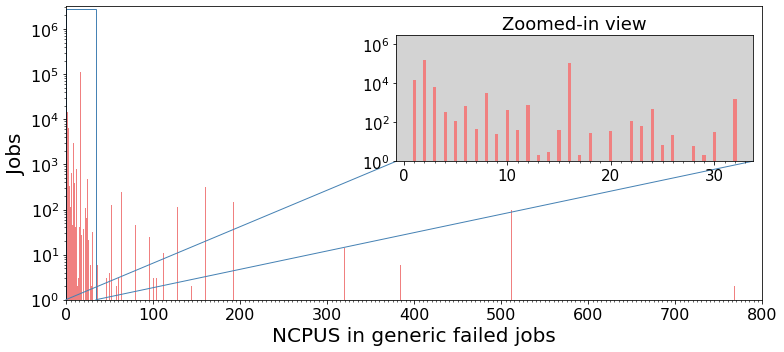

In [558]:
# Generate array containing counts of cpu core allocation for jobs 
counts_cpus = np.unique(ge_failed["NCPUS"].values, return_counts=True)

fig, ax = plt.subplots(figsize=(11,5))

ax.set_yscale("log")
ax.set_ylim(bottom=1)
ax.set_ylim(top=10**6.5)
ax.set_xlim((0,800))
ax.bar(counts_cpus[0], counts_cpus[1], width=1, color="lightcoral")
ax.set_xlabel("NCPUS in generic failed jobs", fontsize=20)

majors = [0, 100, 200, 300, 400, 500, 600, 700, 800]
ax.xaxis.set_major_locator(FixedLocator(majors))
ax.xaxis.set_minor_locator(FixedLocator((np.arange(min(counts_cpus[0]-1), 800, 5))))
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=16)

plt.ylabel("Jobs", fontsize=20)
plt.tight_layout()

a = plt.axes([.505, .54, .45, .35], facecolor='lightgrey')
a.set_ylim(bottom=1, top=10**6.45)
a.bar(counts_cpus[0][0:30], counts_cpus[1][0:30], width=0.3, color="lightcoral")
a.set_title('Zoomed-in view', fontsize=18)
a.set_yscale("log")
majors_2 = [0, 10, 20, 30, 40, 50]
a.xaxis.set_major_locator(FixedLocator(majors_2))
a.xaxis.set_minor_locator(FixedLocator((np.arange(min(counts_cpus[0]-1), 50, 1))))
a.tick_params(axis='both', which='major', labelsize=15)
a.tick_params(axis='both', which='minor', labelsize=15)

mark_inset(ax, a, loc1=3, loc2=4, fc="none", ec="steelblue")


fig.savefig("fig-ge-failed-job-ncpu.pdf")

(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0x7fc2c9c666a0>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x7fc2c9d09670>)

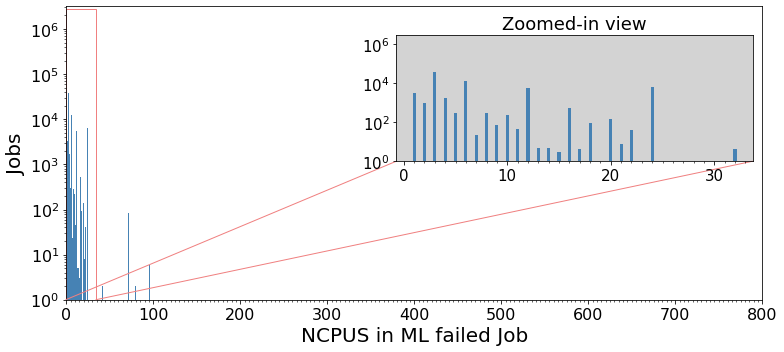

In [566]:
# Generate array containing counts of cpu core allocation for jobs 
counts_cpus = np.unique(ml_failed["NCPUS"].values, return_counts=True)

fig, ax = plt.subplots(figsize=(11,5))

ax.set_yscale("log")
ax.set_ylim(bottom=1)
ax.set_ylim(top=10**6.5)
ax.set_xlim((0,800))
ax.bar(counts_cpus[0], counts_cpus[1], width=1, color="steelblue")
ax.set_xlabel("NCPUS in ML failed Job", fontsize=20)

majors = [0, 100, 200, 300, 400, 500, 600, 700, 800]
ax.xaxis.set_major_locator(FixedLocator(majors))
ax.xaxis.set_minor_locator(FixedLocator((np.arange(min(counts_cpus[0]-1), 800, 5))))
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=16)

plt.ylabel("Jobs", fontsize=20)
plt.tight_layout()

a = plt.axes([.505, .54, .45, .35], facecolor='lightgrey')
a.set_ylim(bottom=1, top=10**6.45)
a.bar(counts_cpus[0][0:23], counts_cpus[1][0:23], width=0.3, color="steelblue")
a.set_title('Zoomed-in view', fontsize=18)
a.set_yscale("log")
majors_2 = [0, 10, 20, 30, 40, 50]
a.xaxis.set_major_locator(FixedLocator(majors_2))
a.xaxis.set_minor_locator(FixedLocator((np.arange(min(counts_cpus[0]-1), 50, 1))))
a.tick_params(axis='both', which='major', labelsize=15)
a.tick_params(axis='both', which='minor', labelsize=15)

mark_inset(ax, a, loc1=3, loc2=4, fc="none", ec="lightcoral")


# fig.savefig(f"job_cpus_count_zoom_{date_time}.pdf")

<ipython-input-616-3dfe5cb00e35>:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


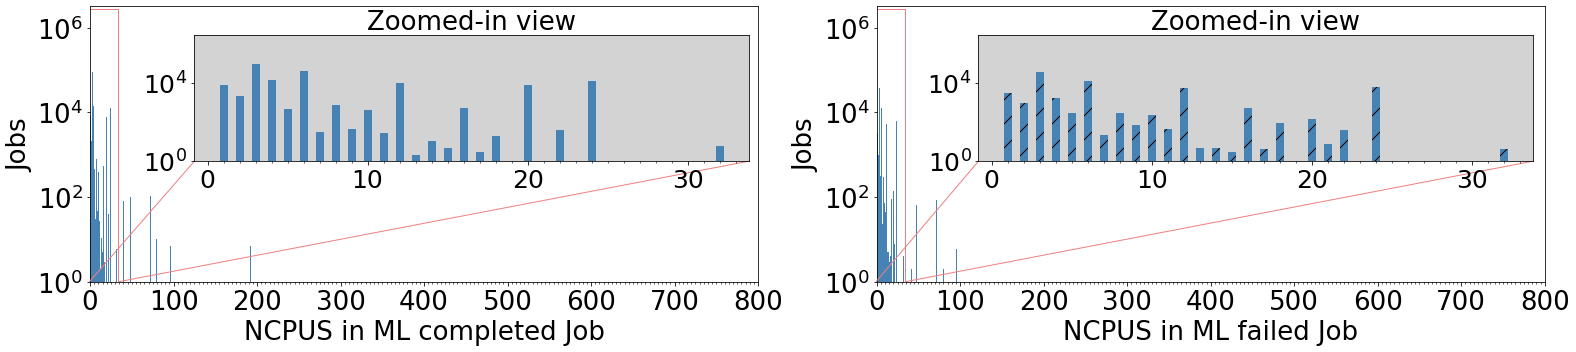

In [616]:
fig, ax = plt.subplots(figsize = (22, 5), nrows = 1, ncols = 2)

# CPU of ML completed jobs
counts_cpus = np.unique(ml_completed["NCPUS"].values, return_counts=True)
ax[0].set_yscale("log")
ax[0].set_ylim(bottom=1)
ax[0].set_ylim(top=10**6.5)
ax[0].set_xlim((0,800))
ax[0].bar(counts_cpus[0], counts_cpus[1], width=1, color="steelblue")
ax[0].set_xlabel("NCPUS in ML completed Job", fontsize=26)

majors = [0, 100, 200, 300, 400, 500, 600, 700, 800]
ax[0].xaxis.set_major_locator(FixedLocator(majors))
ax[0].xaxis.set_minor_locator(FixedLocator((np.arange(min(counts_cpus[0]-1), 800, 5))))
ax[0].tick_params(axis='both', which='major', labelsize=26)
ax[0].tick_params(axis='both', which='minor', labelsize=26)

ax[0].set_ylabel("Jobs", fontsize=26)

a = plt.axes([.125, .54, .35, .35], facecolor='lightgrey')
a.set_ylim(bottom=1, top=10**6.45)
a.bar(counts_cpus[0][0:22], counts_cpus[1][0:22], width=0.5, color="steelblue")
a.set_title('Zoomed-in view', fontsize=26)
a.set_yscale("log")
majors_2 = [0, 10, 20, 30, 40, 50]
a.xaxis.set_major_locator(FixedLocator(majors_2))
a.xaxis.set_minor_locator(FixedLocator((np.arange(min(counts_cpus[0]-1), 50, 1))))
a.tick_params(axis='both', which='major', labelsize=25)
a.tick_params(axis='both', which='minor', labelsize=25)

mark_inset(ax[0], a, loc1=3, loc2=4, fc="none", ec="lightcoral")

# CPU of ML failed jobs
counts_cpus = np.unique(ml_failed["NCPUS"].values, return_counts=True)
ax[1].set_yscale("log")
ax[1].set_ylim(bottom=1)
ax[1].set_ylim(top=10**6.5)
ax[1].set_xlim((0,800))
ax[1].bar(counts_cpus[0], counts_cpus[1], width=1, color="steelblue")
ax[1].set_xlabel("NCPUS in ML failed Job", fontsize=26)

majors = [0, 100, 200, 300, 400, 500, 600, 700, 800]
ax[1].xaxis.set_major_locator(FixedLocator(majors))
ax[1].xaxis.set_minor_locator(FixedLocator((np.arange(min(counts_cpus[0]-1), 800, 5))))
ax[1].tick_params(axis='both', which='major', labelsize=26)
ax[1].tick_params(axis='both', which='minor', labelsize=26)

ax[1].set_ylabel("Jobs", fontsize=26)

a = plt.axes([.620, .54, .35, .35], facecolor='lightgrey')
a.set_ylim(bottom=1, top=10**6.45)
a.bar(counts_cpus[0][0:23], counts_cpus[1][0:23], width=0.5, color="steelblue", hatch='/')
a.set_title('Zoomed-in view', fontsize=26)
a.set_yscale("log")
majors_2 = [0, 10, 20, 30, 40, 50]
a.xaxis.set_major_locator(FixedLocator(majors_2))
a.xaxis.set_minor_locator(FixedLocator((np.arange(min(counts_cpus[0]-1), 50, 1))))
a.tick_params(axis='both', which='major', labelsize=25)
a.tick_params(axis='both', which='minor', labelsize=25)

mark_inset(ax[1], a, loc1=3, loc2=4, fc="none", ec="lightcoral")


plt.tight_layout()
plt.show()
fig.savefig('fig-ml-cpu.pdf', bbox_inches = 'tight')

<ipython-input-621-4c1a7df1e2b3>:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


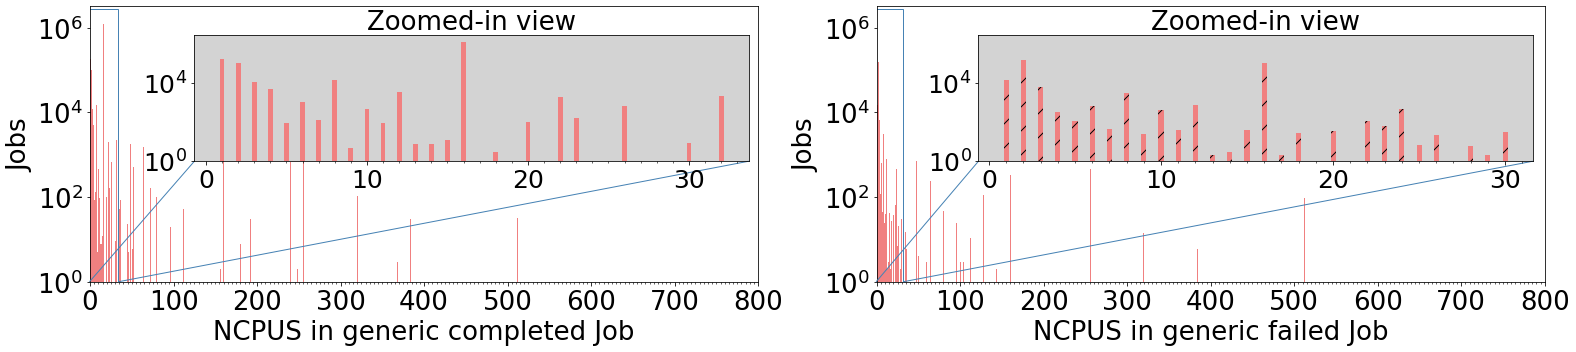

In [621]:
fig, ax = plt.subplots(figsize = (22, 5), nrows = 1, ncols = 2)

# CPU of ML completed jobs
counts_cpus = np.unique(ge_completed["NCPUS"].values, return_counts=True)
ax[0].set_yscale("log")
ax[0].set_ylim(bottom=1)
ax[0].set_ylim(top=10**6.5)
ax[0].set_xlim((0,800))
ax[0].bar(counts_cpus[0], counts_cpus[1], width=1, color="lightcoral")
ax[0].set_xlabel("NCPUS in generic completed Job", fontsize=26)

majors = [0, 100, 200, 300, 400, 500, 600, 700, 800]
ax[0].xaxis.set_major_locator(FixedLocator(majors))
ax[0].xaxis.set_minor_locator(FixedLocator((np.arange(min(counts_cpus[0]-1), 800, 5))))
ax[0].tick_params(axis='both', which='major', labelsize=26)
ax[0].tick_params(axis='both', which='minor', labelsize=26)

ax[0].set_ylabel("Jobs", fontsize=26)

a = plt.axes([.125, .54, .35, .35], facecolor='lightgrey')
a.set_ylim(bottom=1, top=10**6.45)
a.bar(counts_cpus[0][0:25], counts_cpus[1][0:25], width=0.3, color="lightcoral")
a.set_title('Zoomed-in view', fontsize=26)
a.set_yscale("log")
majors_2 = [0, 10, 20, 30, 40, 50]
a.xaxis.set_major_locator(FixedLocator(majors_2))
a.xaxis.set_minor_locator(FixedLocator((np.arange(min(counts_cpus[0]-1), 50, 1))))
a.tick_params(axis='both', which='major', labelsize=25)
a.tick_params(axis='both', which='minor', labelsize=25)

mark_inset(ax[0], a, loc1=3, loc2=4, fc="none", ec="steelblue")

# CPU of ML failed jobs
counts_cpus = np.unique(ge_failed["NCPUS"].values, return_counts=True)
ax[1].set_yscale("log")
ax[1].set_ylim(bottom=1)
ax[1].set_ylim(top=10**6.5)
ax[1].set_xlim((0,800))
ax[1].bar(counts_cpus[0], counts_cpus[1], width=1, color="lightcoral")
ax[1].set_xlabel("NCPUS in generic failed Job", fontsize=26)

majors = [0, 100, 200, 300, 400, 500, 600, 700, 800]
ax[1].xaxis.set_major_locator(FixedLocator(majors))
ax[1].xaxis.set_minor_locator(FixedLocator((np.arange(min(counts_cpus[0]-1), 800, 5))))
ax[1].tick_params(axis='both', which='major', labelsize=26)
ax[1].tick_params(axis='both', which='minor', labelsize=26)

ax[1].set_ylabel("Jobs", fontsize=26)

a = plt.axes([.620, .54, .35, .35], facecolor='lightgrey')
a.set_ylim(bottom=1, top=10**6.45)
a.bar(counts_cpus[0][0:28], counts_cpus[1][0:28], width=0.3, color="lightcoral", hatch='/')
a.set_title('Zoomed-in view', fontsize=26)
a.set_yscale("log")
majors_2 = [0, 10, 20, 30, 40, 50]
a.xaxis.set_major_locator(FixedLocator(majors_2))
a.xaxis.set_minor_locator(FixedLocator((np.arange(min(counts_cpus[0]-1), 50, 1))))
a.tick_params(axis='both', which='major', labelsize=25)
a.tick_params(axis='both', which='minor', labelsize=25)

mark_inset(ax[1], a, loc1=3, loc2=4, fc="none", ec="steelblue")


plt.tight_layout()
plt.show()
fig.savefig('fig-generic-cpu.pdf', bbox_inches = 'tight')

In [ ]:
# stack bar chart: CPUTimeRAW
def jobType(x):
    if(x < 300):
        return '$<$1 day'
    elif(x < 3600):
        return '$<$5 day'
    elif (x < 86100):
        return '$<$10 day'
    else:
        return '$\geq$10 day'

df['type'] = df['CPUTimeRAW'].apply(lambda x: jobType(x))




In [556]:
ml_failed['NCPUS'].quantile([0, 0.25, 0.5, 0.75, 0.9, 1])

0.00     1.0
0.25     3.0
0.50     3.0
0.75     6.0
0.90    16.0
1.00    96.0
Name: NCPUS, dtype: float64

In [599]:
ge_failed['NCPUS'].quantile([0, 0.25, 0.5, 0.75, 0.99, 1])

0.00       1.0
0.25       2.0
0.50       2.0
0.75      16.0
0.99     160.0
1.00    2048.0
Name: NCPUS, dtype: float64

In [447]:
ge_completed['CPUTimeRAW'].median()

352.0

In [375]:
ge_failed['ReqCPUS'].quantile([0.25, 0.5, 0.75, 1])

0.25       1.0
0.50       1.0
0.75       1.0
1.00    2048.0
Name: ReqCPUS, dtype: float64

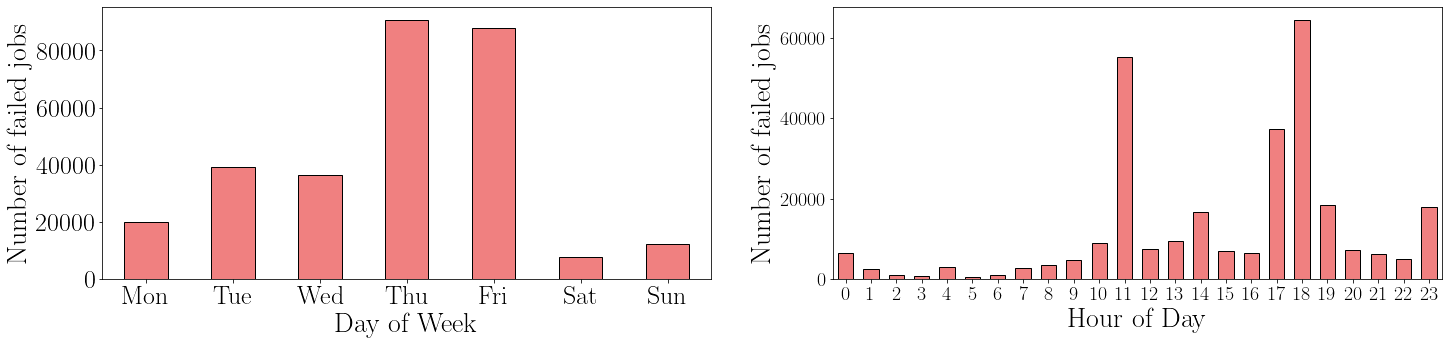

In [30]:
# fig-generic-failures-week-and-day
fig, axes = plt.subplots(figsize = (24, 5), nrows = 1, ncols = 2)

x_vals = np.arange(ge_failed["submit_hour_of_day"].nunique())
y_vals = ge_failed["submit_hour_of_day"].value_counts(sort=False)
axes[1].bar(x_vals, y_vals, edgecolor='black', capsize=5, width = 0.6, color = 'lightcoral')
axes[1].set_ylim(bottom=0, top=None)
axes[1].set_xlim(-0.5,23.5)
axes[1].set_xlabel("Hour of Day",  fontsize=28)
axes[1].set_ylabel("Number of failed jobs", fontsize=28)
axes[1].tick_params(axis='both', which='major', labelsize=20)
axes[1].tick_params(axis='both', which='minor', labelsize=20)
axes[1].xaxis.set_major_locator(MultipleLocator(1))

x_vals = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
y_vals = ge_failed["submit_day_of_week"].value_counts(sort=False)
axes[0].bar(x_vals, y_vals, edgecolor='black', capsize=3, width = 0.5, color = 'lightcoral')
axes[0].set_ylim(bottom=0, top=None)
axes[0].set_xlim(-0.5,6.5)
axes[0].set_xlabel("Day of Week", fontsize=28)
axes[0].set_ylabel("Number of failed jobs", fontsize=28)
axes[0].tick_params(axis='both', which='major', labelsize=26)
axes[0].tick_params(axis='both', which='minor', labelsize=26)
axes[0].xaxis.set_major_locator(MultipleLocator(1))

plt.show()
fig.savefig('fig-generic-failures-week-and-day.pdf', bbox_inches = 'tight')

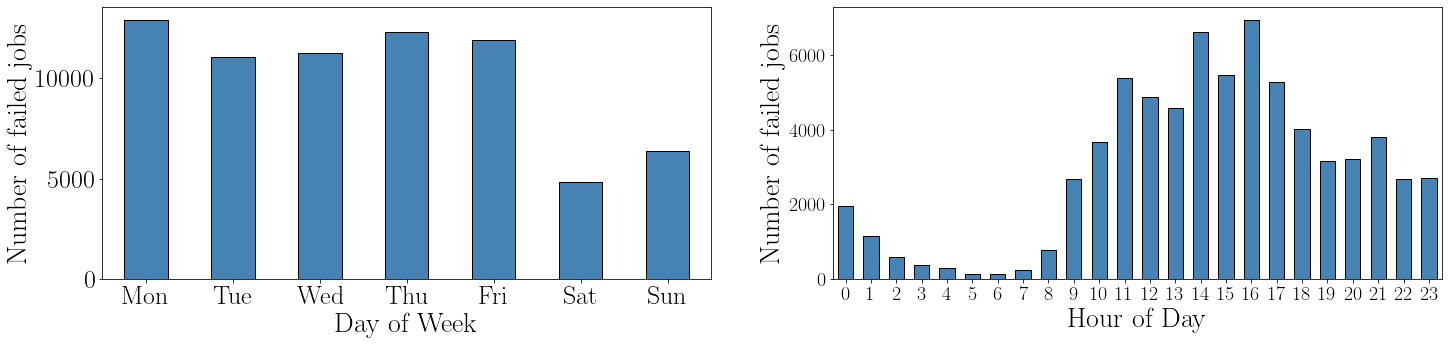

In [31]:
# fig-ml-failures-week-and-day
fig, axes = plt.subplots(figsize = (24, 5), nrows = 1, ncols = 2)

x_vals = np.arange(ml_failed["submit_hour_of_day"].nunique())
y_vals = ml_failed["submit_hour_of_day"].value_counts(sort=False)
axes[1].bar(x_vals, y_vals, edgecolor='black', capsize=2, width = 0.6, color = 'steelblue')
axes[1].set_ylim(bottom=0, top=None)
axes[1].set_xlim(-0.5,23.5)
axes[1].set_xlabel("Hour of Day",  fontsize=28)
axes[1].set_ylabel("Number of failed jobs", fontsize=28)
axes[1].tick_params(axis='both', which='major', labelsize=20)
axes[1].tick_params(axis='both', which='minor', labelsize=20)
axes[1].xaxis.set_major_locator(MultipleLocator(1))

x_vals = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
y_vals = ml_failed["submit_day_of_week"].value_counts(sort=False)
axes[0].bar(x_vals, y_vals, edgecolor='black', capsize=2, width = 0.5, color = 'steelblue')
axes[0].set_ylim(bottom=0, top=None)
axes[0].set_xlim(-0.5,6.5)
axes[0].set_xlabel("Day of Week", fontsize=28)
axes[0].set_ylabel("Number of failed jobs", fontsize=28)
axes[0].tick_params(axis='both', which='major', labelsize=26)
axes[0].tick_params(axis='both', which='minor', labelsize=26)
axes[0].xaxis.set_major_locator(MultipleLocator(1))

plt.show()
fig.savefig('fig-ml-failures-week-and-day.pdf', bbox_inches = 'tight')

In [32]:
ml_failed['Submit'] = pd.to_datetime(ml_failed['Submit'], format = '%Y-%m-%d %H:%M:%S')
ml_failed['day'] = ml_failed['Submit'].dt.date
ml_failed['month'] = ml_failed['day'].apply(lambda x: str(x)[:7])
ml_failed["hour_of_day"] = ml_failed["Submit"].dt.hour

def dt_to_week(df):
    l = []
    for i in df['Submit']:
        j = i.strftime("%W")
        l.append(j)
    df['week'] = l
    return df
def dt_to_day(df):
    l = []
    for i in df['Submit']:
        j = i.strftime("%j")
        j = int(j)
        l.append(j)
    df['day'] = l
    return df

ml_failed = dt_to_week(ml_failed)
ml_failed = dt_to_day(ml_failed)
ml_failed["hour"] = (ml_failed["day"]-1)*24 + ml_failed["hour_of_day"]

# df_month
group = ml_failed.groupby(["month"])
failL = []
for i in group:
    a = i[1]['state'].value_counts().to_frame()
    fail = a.loc['FAILED','state']
    failL.append(fail)
df_month = pd.DataFrame({
    "month": [1,2,3,4,5,6,7,8,9,10,11,12],
    "failed": failL
})

# df_week
group = ml_failed.groupby(["week"])
failL, iL = [], []
for i in group:
    a = i[1]['state'].value_counts().to_frame()
    fail = a.loc['FAILED','state']
    failL.append(fail)
    iL.append(i[0])

df_week = pd.DataFrame({
    "week": iL,
    "failed": failL
})

# df_day
group = ml_failed.groupby(["day"])
failL, iL = [], []
for i in group:
    a = i[1]['state'].value_counts().to_frame()
    fail = a.loc['FAILED','state']
    failL.append(fail)
    iL.append(i[0])

df_day = pd.DataFrame({
    "day": iL,
    "failed": failL
})

# df_hour
group = ml_failed.groupby(["hour"])
failL, iL = [], []
for i in group:
    a = i[1]['state'].value_counts().to_frame()
    fail = a.loc['FAILED','state']
    failL.append(fail)
    iL.append(i[0])

df_hour = pd.DataFrame({
    "hour": iL,
    "failed": failL
})


/Users/chuxiaoyu/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/chuxiaoyu/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/chuxiaoyu/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [33]:
# df_hour
ml_failed["hour"] = (ml_failed["day"]-1)*24 + ml_failed["hour_of_day"]
ml_failed["hour"]

/Users/chuxiaoyu/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


116          16
117          16
125          16
133          16
136          16
           ... 
2300247    8726
2300249    8726
2300835    8748
2300836    8748
2300838    8748
Name: hour, Length: 70693, dtype: int64

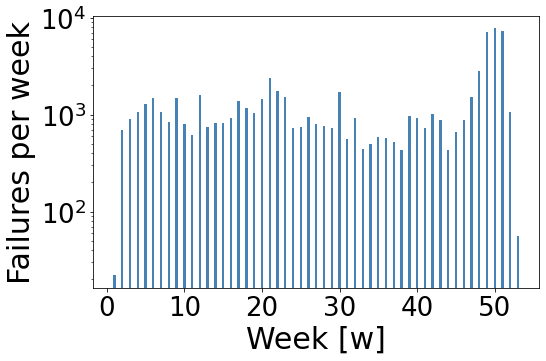

In [10]:
fig = plt.figure(figsize=(8, 5))
x = range(1,len(df_week)+1)
y = df_week['failed']
plt.xlabel('Week [w]', fontsize=30)
plt.ylabel('Failures per week', fontsize=30)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.yscale("log")
plt.bar(x,y,color='steelblue',width=0.3)

# fig.savefig('fig-failures-per-week.pdf', bbox_inches = 'tight')
plt.show()

In [34]:
df_week['normalize'] = (df_week['failed']-df_week['failed'].min())/(df_week['failed'].max()-df_week['failed'].min())
df_week.head()

,week,failed,normalize
0,00,22,0.000000
1,01,691,0.086748
2,02,892,0.112811
3,03,1051,0.133428
4,04,1284,0.163641


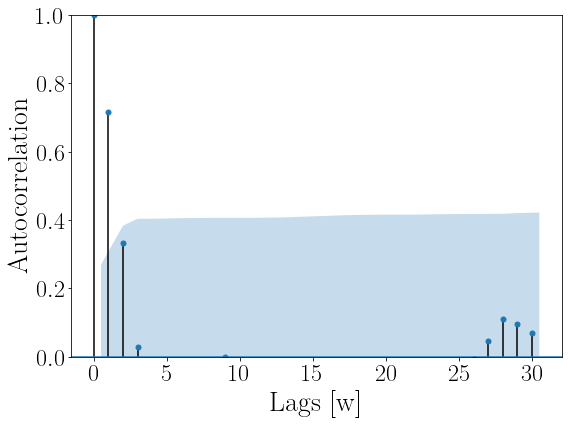

In [35]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot autocorrelation
plt.rc("figure", figsize=(8,6))
plot_acf(df_week['failed'], lags=30)
plt.ylim(0,1)
# plt.xlim((-1,500))
plt.xlabel('Lags [w]', fontsize=28)
plt.ylabel('Autocorrelation', fontsize=28)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
# plt.yscale("log")
plt.title('',fontsize=0)
plt.tight_layout()
plt.savefig('fig-lags-week.pdf', bbox_inches = 'tight')
plt.show()

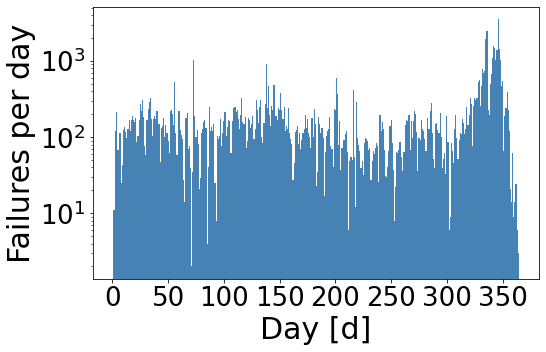

In [9]:
fig = plt.figure(figsize=(8, 5))
x = range(1,len(df_day)+1)
y = df_day['failed']
plt.xlabel('Day [d]', fontsize=30)
plt.ylabel('Failures per day', fontsize=30)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.yscale("log")
plt.bar(x,y,color='steelblue',width=1)
# fig.savefig('fig-failures-per-day.pdf', bbox_inches = 'tight')
plt.show()

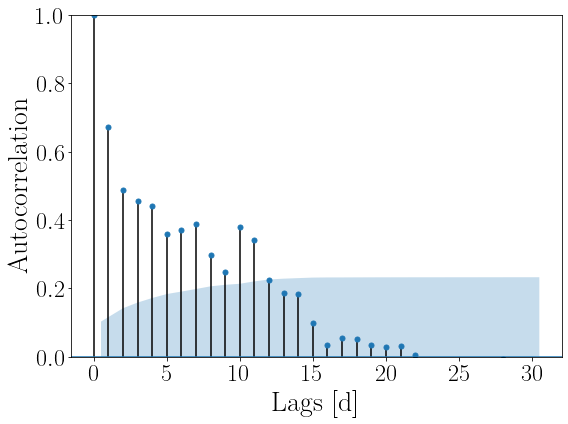

In [36]:
plt.rc("figure", figsize=(8,6))
plot_acf(df_day['failed'], lags=30)
plt.ylim(0,1)
# plt.xlim((-1,500))
plt.xlabel('Lags [d]', fontsize=28)
plt.ylabel('Autocorrelation', fontsize=28)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
# plt.yscale("log")
plt.title('',fontsize=0)
plt.tight_layout()
plt.savefig('fig-lags-day.pdf', bbox_inches = 'tight')
plt.show()

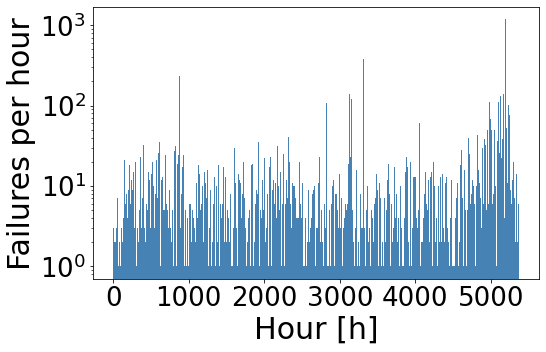

In [11]:
fig = plt.figure(figsize=(8, 5))
x = range(1,len(df_hour)+1)
y = df_hour['failed']
plt.xlabel('Hour [h]', fontsize=30)
plt.ylabel('Failures per hour', fontsize=30)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.yscale("log")
plt.bar(x,y,color='steelblue',width=1)
#fig.savefig('fig-failures-per-hour.pdf', bbox_inches = 'tight')
plt.show()

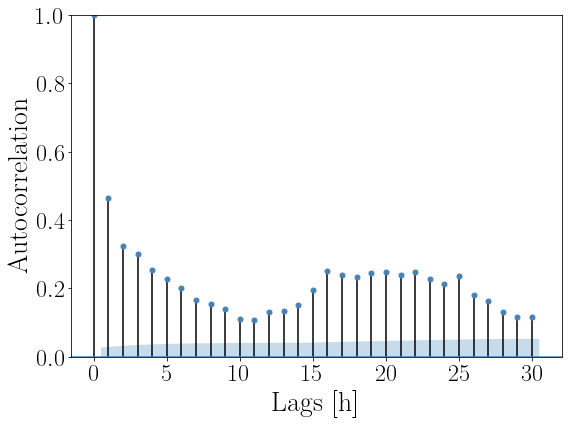

In [37]:
plt.rc("figure", figsize=(8,6))
plot_acf(df_hour['failed'], lags=30,color='steelblue')
plt.ylim(0,1)
# plt.xlim((-1,500))
plt.xlabel('Lags [h]', fontsize=28)
plt.ylabel('Autocorrelation', fontsize=28)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
# plt.yscale("log")
plt.title('',fontsize=0)
plt.tight_layout()
plt.savefig('fig-lags-hour.pdf', bbox_inches = 'tight')
plt.show()